# DOTE6756BB-Machine Learning Individual Project

### **Dataset Description**

| Category | Features |
| --- | --- |
| **Target variable (classification)** | `action_type` - Decisions made by the delivery-men (PICKUP/DELIVERY)  |
| **Target variable (regression)** | `expected_use_time` -  Expected time of the deliery-man's next action |
| **Demographic** | `courier_id`, `wave_index`, `tracking_id`, `date`, `group`, `id` |
| **Geographic Information** | `courier_wave_start_lng`, `courier_wave_start_lat`, `target_lng`, `target_lat` |
| **Courier Information** | `level`, `speed`, `max_load` |
| **Courier's Previous Action Information** | `source_type`, `source_tracking_id`, `source_lng`, `source_lat` |
| **Others** | - `weather_grade` - Weather condition <br> - `aoi_id` - Area of Interest (i.e. delivery destination) <br> - `shop_id` - Shop ID <br> - `grid_distance` - Shortest Travel Distance (provided by GPS) <br> - `hour` - The hour in the day <br> - `urgency` - How urgent the order is |

### **Data Loading and Exploration**

#### Import libraries

In [175]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline

#### Load dataset

In [176]:
df_train = pd.read_csv("../Data/dataframe_train.csv")
df_test = pd.read_csv("../Data/dataframe_test.csv")

df_train.columns

Index(['courier_id', 'wave_index', 'tracking_id', 'courier_wave_start_lng',
       'courier_wave_start_lat', 'action_type', 'date', 'group', 'level',
       'speed', 'max_load', 'weather_grade', 'aoi_id', 'shop_id', 'id',
       'source_type', 'source_tracking_id', 'source_lng', 'source_lat',
       'target_lng', 'target_lat', 'grid_distance', 'expected_use_time',
       'urgency', 'hour'],
      dtype='object')

In [177]:
df_train.head(10)

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,action_type,date,group,level,speed,...,source_type,source_tracking_id,source_lng,source_lat,target_lng,target_lat,grid_distance,expected_use_time,urgency,hour
0,10007871,0,2.100070e+18,121.630997,39.142343,PICKUP,20200201,2.020020e+16,3,4.751832,...,ASSIGN,2.100070e+18,121.630997,39.142343,121.632547,39.141946,377.0,804,1246,11
1,10007871,0,2.100070e+18,121.630997,39.142343,DELIVERY,20200201,2.020020e+16,3,4.751832,...,PICKUP,2.100070e+18,121.632547,39.141946,121.626144,39.140281,780.0,298,1246,11
2,10007871,0,2.100070e+18,121.630997,39.142343,PICKUP,20200201,2.020020e+16,3,4.751832,...,DELIVERY,2.100070e+18,121.626144,39.140281,121.631219,39.141811,550.0,545,2462,11
3,10007871,0,2.100070e+18,121.630997,39.142343,DELIVERY,20200201,2.020020e+16,3,4.751832,...,PICKUP,2.100070e+18,121.631219,39.141811,121.632084,39.146201,707.0,341,1205,11
4,10007871,0,2.100070e+18,121.630997,39.142343,PICKUP,20200201,2.020020e+16,3,4.751832,...,DELIVERY,2.100070e+18,121.632084,39.146201,121.631574,39.142231,770.0,166,1882,11
5,10007871,0,2.100070e+18,121.630997,39.142343,DELIVERY,20200201,2.020020e+16,3,4.751832,...,PICKUP,2.100070e+18,121.631574,39.142231,121.635154,39.143561,446.0,315,1045,11
6,10007871,1,2.100070e+18,121.631208,39.142519,PICKUP,20200201,2.020020e+16,3,4.751832,...,ASSIGN,2.100070e+18,121.631208,39.142519,121.631984,39.142532,456.0,537,2194,12
7,10007871,1,2.100070e+18,121.631208,39.142519,DELIVERY,20200201,2.020020e+16,3,4.751832,...,PICKUP,2.100070e+18,121.631984,39.142532,121.624184,39.143921,1346.0,759,757,12
8,10007871,1,2.100070e+18,121.631208,39.142519,PICKUP,20200201,2.020020e+16,3,4.751832,...,DELIVERY,2.100070e+18,121.624184,39.143921,121.626641,39.150320,902.0,434,2553,12
9,10007871,1,2.100070e+18,121.631208,39.142519,DELIVERY,20200201,2.020020e+16,3,4.751832,...,PICKUP,2.100070e+18,121.626641,39.150320,121.636904,39.142721,1769.0,529,998,12


In [178]:
# check data types and non-null counts
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509604 entries, 0 to 509603
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   courier_id              509604 non-null  int64  
 1   wave_index              509604 non-null  int64  
 2   tracking_id             509604 non-null  float64
 3   courier_wave_start_lng  509604 non-null  float64
 4   courier_wave_start_lat  509604 non-null  float64
 5   action_type             509604 non-null  object 
 6   date                    509604 non-null  int64  
 7   group                   509604 non-null  float64
 8   level                   509604 non-null  int64  
 9   speed                   509604 non-null  float64
 10  max_load                509604 non-null  int64  
 11  weather_grade           509604 non-null  object 
 12  aoi_id                  509604 non-null  object 
 13  shop_id                 509604 non-null  object 
 14  id                  

In [179]:
df_train.describe()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,id,source_tracking_id,source_lng,source_lat,target_lng,target_lat,grid_distance,expected_use_time,urgency,hour
count,5.096040e+05,509604.000000,5.096040e+05,509604.000000,509604.000000,5.096040e+05,5.096040e+05,509604.000000,509604.000000,509604.000000,509604.000000,5.096040e+05,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000
mean,8.151255e+07,2.400154,2.100076e+18,121.534935,39.179724,2.020022e+07,1.496302e+17,2.607338,5.348056,8.980295,254801.500000,2.100076e+18,121.534923,39.179897,121.534882,39.179971,1078.274900,441.655107,1572.033695,14.482592
std,4.903781e+07,2.168523,4.797124e+12,0.151081,0.114737,7.776252e+00,1.333406e+17,0.698855,0.626070,2.028490,147110.147627,4.797965e+12,0.150718,0.113594,0.150752,0.113615,1124.569317,405.080785,4344.556228,3.310272
min,1.000787e+07,0.000000,2.100070e+18,119.876654,36.064995,2.020020e+07,2.020020e+16,0.000000,3.008735,1.000000,0.000000,2.100070e+18,119.876654,36.064995,121.059274,38.826421,0.000000,1.000000,-340771.000000,6.000000
25%,1.069734e+07,1.000000,2.100070e+18,121.444628,39.116955,2.020021e+07,2.020020e+16,2.000000,4.868302,8.000000,127400.750000,2.100070e+18,121.444174,39.117340,121.444254,39.117201,330.000000,189.000000,859.000000,12.000000
50%,1.117511e+08,2.000000,2.100080e+18,121.523819,39.162378,2.020022e+07,2.020020e+17,3.000000,5.458097,9.000000,254801.500000,2.100080e+18,121.523930,39.161311,121.523587,39.161241,869.000000,354.000000,1752.000000,14.000000
75%,1.187608e+08,4.000000,2.100080e+18,121.591983,39.218092,2.020022e+07,2.020020e+17,3.000000,5.779434,10.000000,382202.250000,2.100080e+18,121.591344,39.218011,121.591347,39.218921,1572.000000,584.000000,2590.000000,17.000000
max,1.259969e+08,16.000000,2.100080e+18,122.256382,39.705013,2.020023e+07,2.020020e+18,3.000000,6.943103,19.000000,509603.000000,2.100080e+18,122.260124,39.705013,122.260124,39.695211,429173.000000,9246.000000,11345.000000,23.000000


### **(a) Initial Data Pre-processing**

#### Exploratory Data Analysis (EDA)

##### Target Variable Distribution

Target Variable (action_type) distribution
action_type
PICKUP      254802
DELIVERY    254802
Name: count, dtype: int64

Pick-up Rate: 50.0%


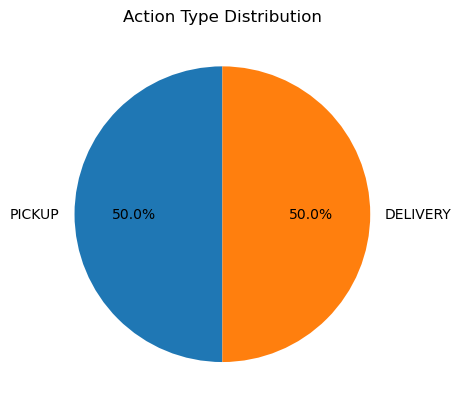

In [180]:
print("Target Variable (action_type) distribution")
print(df_train["action_type"].value_counts())
print(
    f"\nPick-up Rate: {df_train['action_type'].value_counts(normalize=True)['PICKUP'] * 100:.1f}%"
)

# Plot pie chart for action_type distribution
df_train["action_type"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90
)
plt.title("Action Type Distribution")
plt.ylabel("")
plt.show()

**Observation:** The dataset is **balanced**

##### Numerical Features Distribution

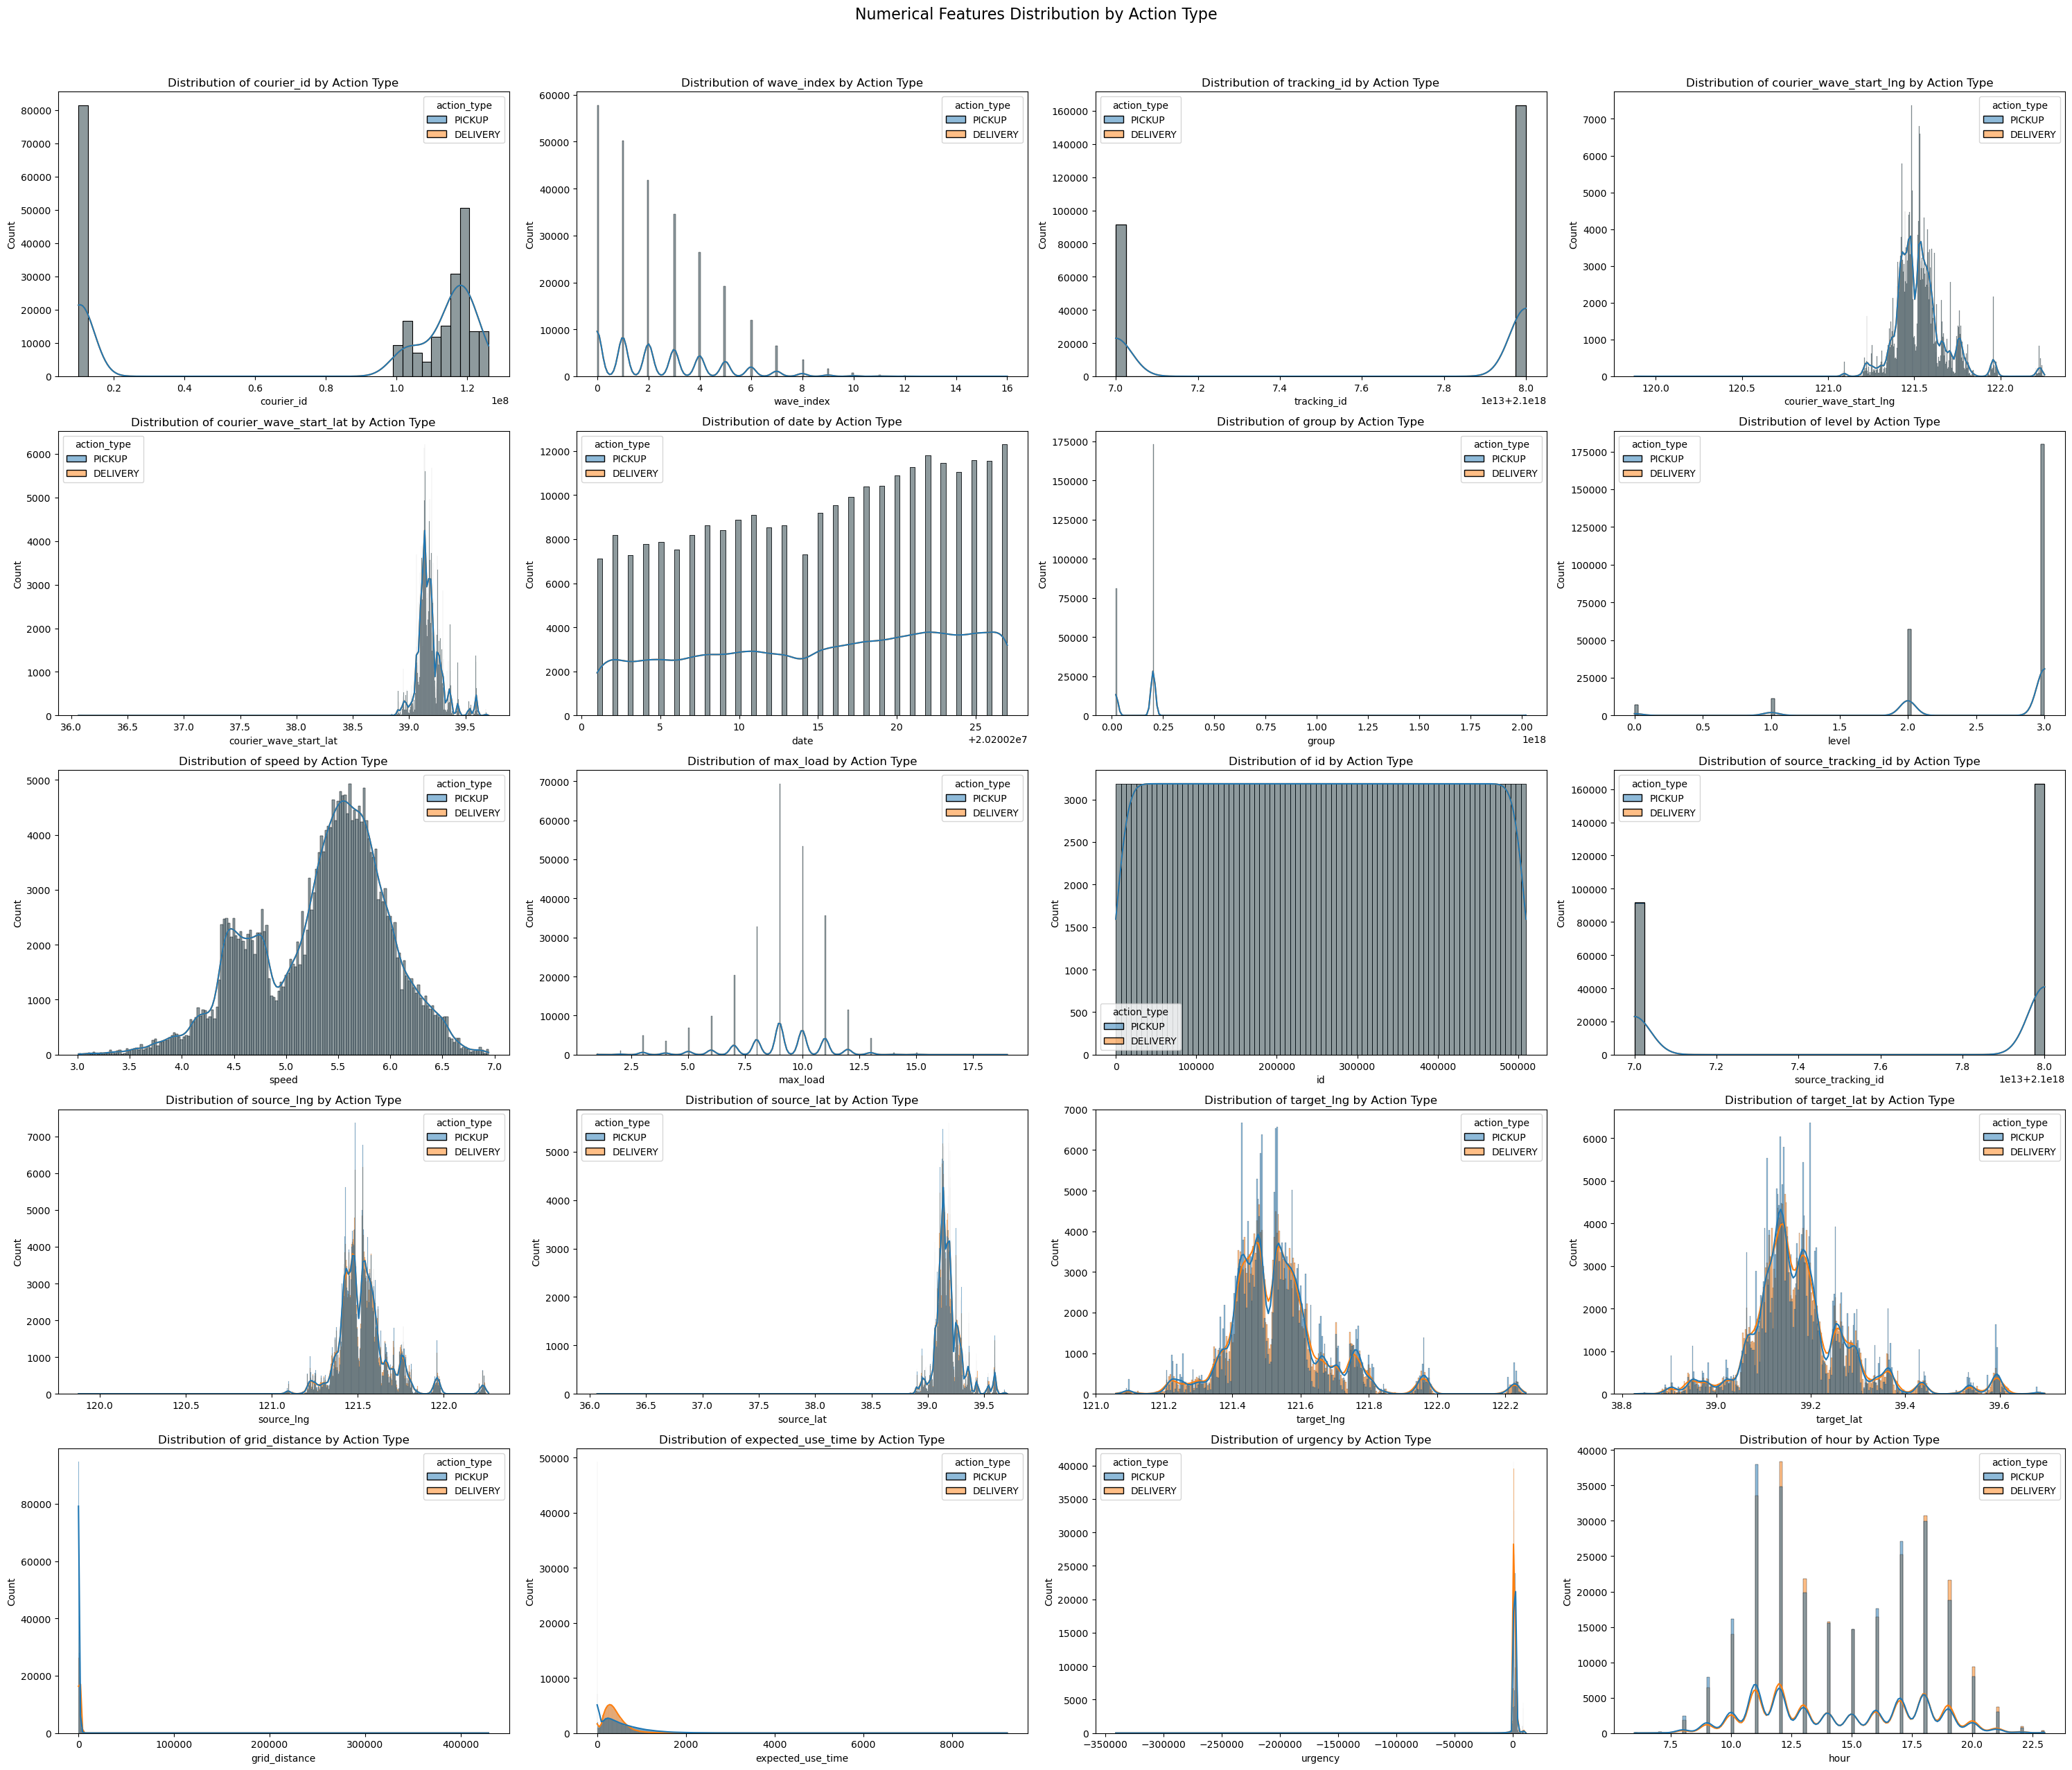

In [181]:
# Visualize distributions of all numerical features
numerical_cols = df_train.select_dtypes([np.number]).columns

n_cols = 4
n_rows = len(numerical_cols) // n_cols
fig2, axes2 = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 5 * n_rows))
axes2 = axes2.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df_train,
        x=col,
        hue="action_type",
        kde=True,
        multiple="layer",
        ax=axes2[i],
    )
    axes2[i].set_title(f"Distribution of {col} by Action Type")

plt.suptitle("Numerical Features Distribution by Action Type", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

**Useless Features:** `courier_id`, `tracking_id`, `id`, `source_tracking_id`, `group`, `wave_index`, `date`, `level`, `max_load`

##### Categorical Features Analysis

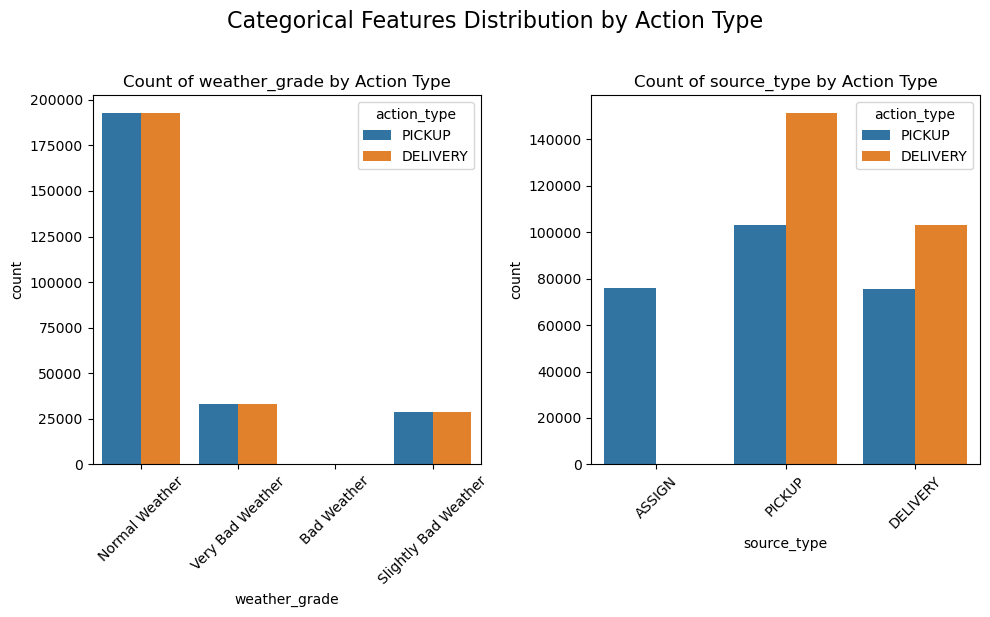

In [182]:
# Visualize categorical
# Identify categorical columns (excluding IDs)
categorical_cols = ["weather_grade", "source_type"]

# Visualize distributions of categorical features
fig3, axes3 = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(10, 6))

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df_train,
        x=col,
        hue="action_type",
        ax=axes3[i] if len(categorical_cols) > 1 else axes3,
    )
    axes3[i].set_title(f"Count of {col} by Action Type")
    axes3[i].tick_params(axis="x", rotation=45)

plt.suptitle("Categorical Features Distribution by Action Type", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### Data Preprocessing

In [183]:
# drop features
df_dropped = df_train.drop(
    columns=[
        "courier_id",
        "tracking_id",
        "id",
        "source_tracking_id",
        "group",
        "wave_index",
        "date",
        "level",
        "max_load",
        "aoi_id",
        "shop_id",
    ]
).dropna()

df_dropped.columns

Index(['courier_wave_start_lng', 'courier_wave_start_lat', 'action_type',
       'speed', 'weather_grade', 'source_type', 'source_lng', 'source_lat',
       'target_lng', 'target_lat', 'grid_distance', 'expected_use_time',
       'urgency', 'hour'],
      dtype='object')

In [184]:
# convert categorical to numeric (binary encoding)
df_dropped["action_type"] = df_dropped["action_type"].map({"PICKUP": 0, "DELIVERY": 1})


# remove outliers
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# grid_distance and urgency are extremely skewed, they have outliers
for col in ["grid_distance", "urgency"]:
    df_dropped = remove_outliers_iqr(df_dropped, col)

# convert weather_grade and source_type to dummies
df_full = pd.get_dummies(df_dropped, columns=["weather_grade", "source_type"], drop_first=True)

df_full.head()

,courier_wave_start_lng,courier_wave_start_lat,action_type,speed,source_lng,source_lat,target_lng,target_lat,grid_distance,expected_use_time,urgency,hour,weather_grade_Normal Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_DELIVERY,source_type_PICKUP
0,121.630997,39.142343,0,4.751832,121.630997,39.142343,121.632547,39.141946,377.0,804,1246,11,True,False,False,False,False
1,121.630997,39.142343,1,4.751832,121.632547,39.141946,121.626144,39.140281,780.0,298,1246,11,True,False,False,False,True
2,121.630997,39.142343,0,4.751832,121.626144,39.140281,121.631219,39.141811,550.0,545,2462,11,True,False,False,True,False
3,121.630997,39.142343,1,4.751832,121.631219,39.141811,121.632084,39.146201,707.0,341,1205,11,True,False,False,False,True
4,121.630997,39.142343,0,4.751832,121.632084,39.146201,121.631574,39.142231,770.0,166,1882,11,True,False,False,True,False


In [185]:
# down sample
df_down_sampled = df_full.sample(20000, random_state=42)

df_down_sampled

,courier_wave_start_lng,courier_wave_start_lat,action_type,speed,source_lng,source_lat,target_lng,target_lat,grid_distance,expected_use_time,urgency,hour,weather_grade_Normal Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_DELIVERY,source_type_PICKUP
227988,121.581208,39.211458,1,5.290450,121.594627,39.208698,121.580584,39.214971,2010.0,642,866,18,True,False,False,False,True
89245,121.962251,39.594213,1,5.340720,121.972355,39.595891,121.963864,39.607481,2086.0,499,773,21,False,False,True,False,True
95158,121.407354,39.237439,0,4.992785,121.407354,39.237439,121.423778,39.245344,2131.0,1051,2842,18,True,False,False,False,False
485723,121.428325,39.198713,0,5.540323,121.426049,39.198390,121.427655,39.196978,470.0,445,1378,11,True,False,False,False,True
205716,121.756407,39.122334,1,5.801755,121.770811,39.120695,121.771194,39.132481,1676.0,584,541,17,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277072,121.593481,39.145964,0,5.159251,121.603764,39.131351,121.602415,39.129656,271.0,195,1974,13,True,False,False,True,False
371636,121.586509,39.111250,1,5.781095,121.587112,39.111955,121.575194,39.108991,1842.0,837,1597,10,True,False,False,False,True
31572,121.948992,39.595655,1,4.665648,121.969434,39.594751,121.969434,39.594751,1.0,256,1599,16,True,False,False,False,True
358822,121.663775,39.058084,1,4.595309,121.665994,39.072261,121.665994,39.072261,1.0,258,2317,10,True,False,False,True,False


In [186]:
# X = df_full.drop(columns=["action_type", "expected_use_time"])
# y_class = df_full["action_type"]
# y_reg = df_full["expected_use_time"]

X = df_down_sampled.drop(columns=["action_type", "expected_use_time"])
y_class = df_down_sampled["action_type"]
y_reg = df_down_sampled["expected_use_time"]

X

,courier_wave_start_lng,courier_wave_start_lat,speed,source_lng,source_lat,target_lng,target_lat,grid_distance,urgency,hour,weather_grade_Normal Weather,weather_grade_Slightly Bad Weather,weather_grade_Very Bad Weather,source_type_DELIVERY,source_type_PICKUP
227988,121.581208,39.211458,5.290450,121.594627,39.208698,121.580584,39.214971,2010.0,866,18,True,False,False,False,True
89245,121.962251,39.594213,5.340720,121.972355,39.595891,121.963864,39.607481,2086.0,773,21,False,False,True,False,True
95158,121.407354,39.237439,4.992785,121.407354,39.237439,121.423778,39.245344,2131.0,2842,18,True,False,False,False,False
485723,121.428325,39.198713,5.540323,121.426049,39.198390,121.427655,39.196978,470.0,1378,11,True,False,False,False,True
205716,121.756407,39.122334,5.801755,121.770811,39.120695,121.771194,39.132481,1676.0,541,17,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277072,121.593481,39.145964,5.159251,121.603764,39.131351,121.602415,39.129656,271.0,1974,13,True,False,False,True,False
371636,121.586509,39.111250,5.781095,121.587112,39.111955,121.575194,39.108991,1842.0,1597,10,True,False,False,False,True
31572,121.948992,39.595655,4.665648,121.969434,39.594751,121.969434,39.594751,1.0,1599,16,True,False,False,False,True
358822,121.663775,39.058084,4.595309,121.665994,39.072261,121.665994,39.072261,1.0,2317,10,True,False,False,True,False


### **(b) Baseline Model**

#### Logistic Regression Model

In [187]:
# Create Pipeline
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

# Stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

for train_index, validation_index in skf.split(X, y_class):
    X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_validation = y_class.iloc[train_index], y_class.iloc[validation_index]
    
    logreg_pipeline.fit(X_train, y_train)
    preds = logreg_pipeline.predict(X_validation)
    
    f1_scores.append(metrics.f1_score(y_validation, preds))
    
print("Baseline Classification (Logistic Regression)")
print("=" * 50) 
print(f"Mean F1-Score: {np.mean(f1_scores)}")

Baseline Classification (Logistic Regression)
Mean F1-Score: 0.7202345818586051


##### Linear Regression Model

In [188]:
# create pipeline
linreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []

for train_index, validation_index in kf.split(X):
    X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_validation = y_reg.iloc[train_index], y_reg.iloc[validation_index]
    
    linreg_pipeline.fit(X_train, y_train)
    preds = linreg_pipeline.predict(X_validation)
    
    mae_scores.append(metrics.mean_absolute_error(y_validation, preds))
    
print("Baseline Regression (Linear Regression)")
print("=" * 50) 
print(f"Mean MAE: {np.mean(mae_scores)}")  

Baseline Regression (Linear Regression)
Mean MAE: 211.47201114248983


### **(c) Other Models**